#Data Loading

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [ ]:
# load the dataset
url = '/content/Real estate valuation data set.xlsx'
realestate = pd.read_excel(url)
realestate

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


1. Nilai Kategori (Discrete):
  - No: Nomor urut (tidak relevan untuk analisis).
  - X4 number of convenience stores: Jumlah toko serba ada (bernilai diskrit, seperti 0, 1, 2, dll).
2. Nilai Kontinu (Continuous):
  - X1 transaction date: Tanggal transaksi (dalam format tahun desimal).
  - X2 house age: Usia rumah (tahun).
  - X3 distance to the nearest MRT station: Jarak ke stasiun MRT (meter).
  - X5 latitude: Lintang (koordinat geografis).
  - X6 longitude: Bujur (koordinat geografis).
  - Y house price of unit area: Harga rumah per unit area (kemungkinan dalam satuan moneter per meter persegi).

#Exploratory Data Analysis

##Deskripsi Variabel

In [ ]:
realestate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
realestate.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


##Missing Value

In [ ]:
realestate = realestate.drop('No', axis=1)

In [ ]:
realestate = realestate.rename(columns={
    'X1 transaction date': 'x1',
    'X2 house age': 'x2',
    'X3 distance to the nearest MRT station': 'x3',
    'X4 number of convenience stores': 'x4',
    'X5 latitude': 'x5',
    'X6 longitude': 'x6',
    'Y house price of unit area': 'y'
})

realestate

,x1,x2,x3,x4,x5,x6,y
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
zero_value = (realestate == 0).sum()
zero_value

,0
x1,0
x2,17
x3,0
x4,67
x5,0
x6,0
y,0


Tidak ada yang perlu dihapus dikarenakan umur rumah dan jumlah toko serba ada masuk akal memiliki nilai 0

In [ ]:
duplicate_rows = realestate[realestate.duplicated()]

if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [ ]:
realestate.shape

(414, 7)

##Menangani Outliers

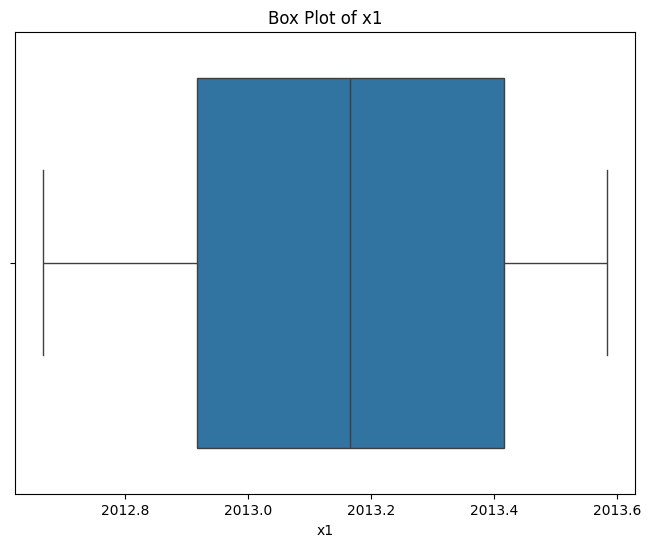

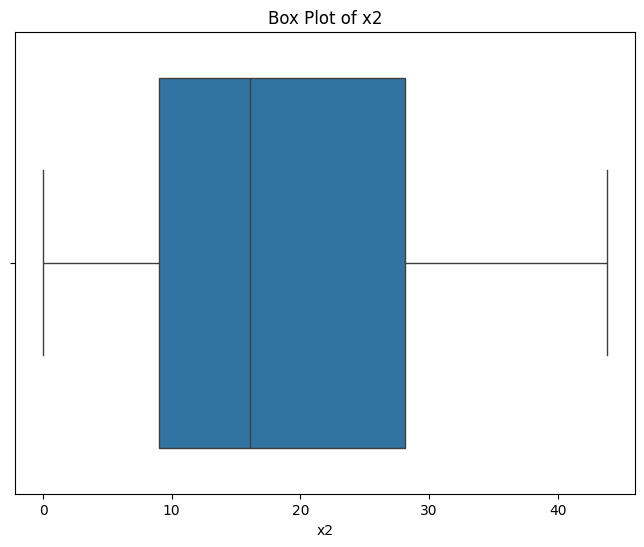

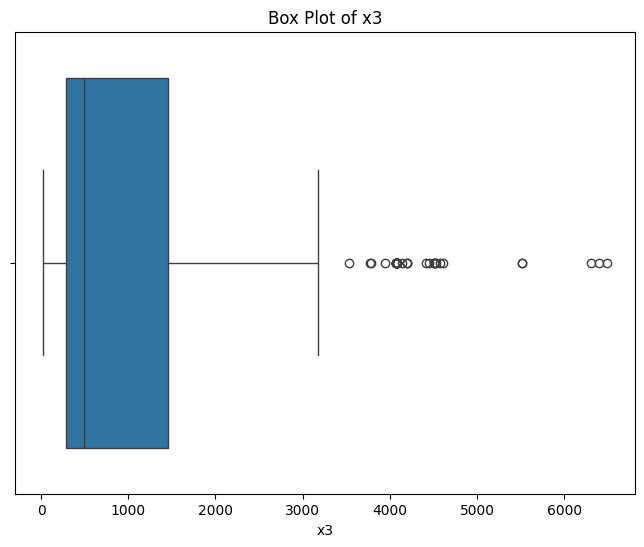

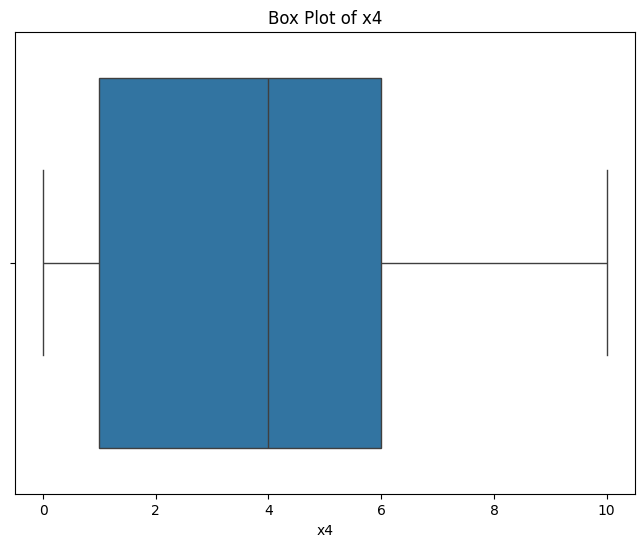

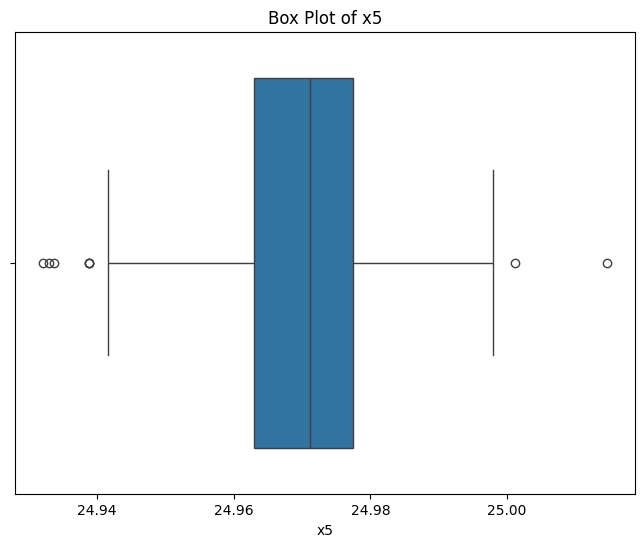

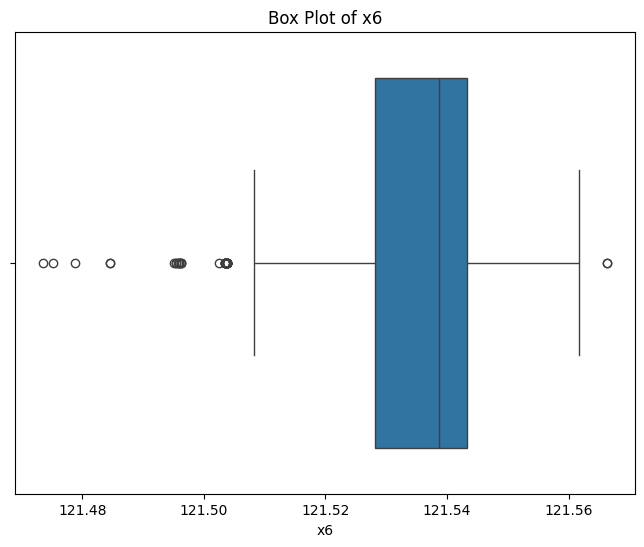

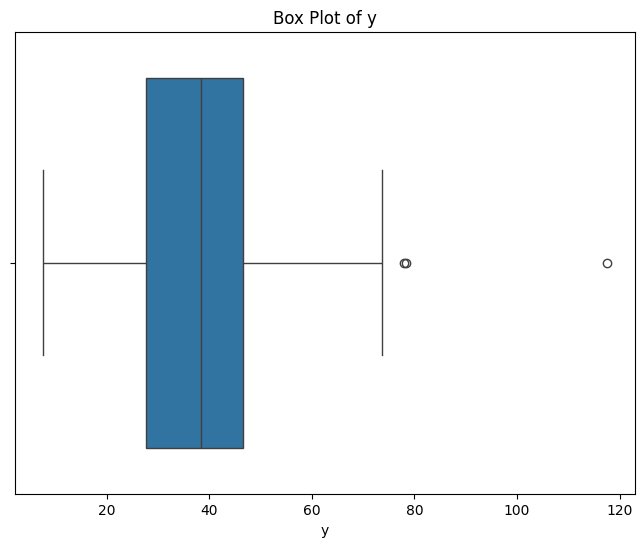

In [ ]:
for column in realestate.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=realestate[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

###IQR Method

In [ ]:
Q1 = realestate.quantile(0.25)
Q3 = realestate.quantile(0.75)
IQR=Q3-Q1
realestate=realestate[~((realestate<(Q1-1.5*IQR))|(realestate>(Q3+1.5*IQR))).any(axis=1)]

realestate.shape

(371, 7)

##Feature Engineering



Penggunaan metode haversine untuk menghitung jarak antara pusat kota (Sindian Dist., New Taipei City, Taiwan) dengan fitur x5 dan x6 (Latitude dan Longitude)

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import haversine_distances

pusat_kota = [121.5398, 24.9785]  # Sindian Dist., New Taipei City
kordinat = realestate[['x6', 'x5']].values  # Kolom x6 (longitude), x5 (latitude)

# Konversi ke radian
kordinat_radians = np.radians(kordinat)
pusat_kota_radians = np.radians(pusat_kota)

# Hitung jarak Haversine
jarak = haversine_distances(kordinat_radians, pusat_kota_radians.reshape(1, -1))

# Konversi ke kilometer (radius bumi = 6371 km)
jarak_km = jarak * 6371
realestate['jarak_ke_pusat(km)'] = jarak_km

print(realestate[['x5', 'x6', 'jarak_ke_pusat(km)']].head())

         x5         x6  jarak_ke_pusat(km)
0  24.98298  121.54024            0.265134
1  24.98034  121.53951            0.111776
2  24.98746  121.54391            0.693179
3  24.98746  121.54391            0.693179
4  24.97937  121.54245            0.298980


<ipython-input-12-733a88b56862>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  realestate['jarak_ke_pusat(km)'] = jarak_km


In [ ]:
realestate = realestate.drop(['x5','x6'], axis=1)

In [ ]:
realestate.head()

,x1,x2,x3,x4,y,jarak_ke_pusat(km)
0,2012.916667,32.0,84.87882,10,37.9,0.265134
1,2012.916667,19.5,306.59470,9,42.2,0.111776
2,2013.583333,13.3,561.98450,5,47.3,0.693179
3,2013.500000,13.3,561.98450,5,54.8,0.693179
4,2012.833333,5.0,390.56840,5,43.1,0.298980


##Univariate Analysis

In [ ]:
numerical_features = ['x1', 'x2', 'x3', 'jarak_ke_pusat(km)', 'y']
categorical_features = ['x4']

###Categorical Features

    jumlah sampel  persentase
x4                           
5              67        18.1
3              46        12.4
6              37        10.0
1              36         9.7
0              36         9.7
7              31         8.4
4              31         8.4
8              30         8.1
2              24         6.5
9              23         6.2
10             10         2.7


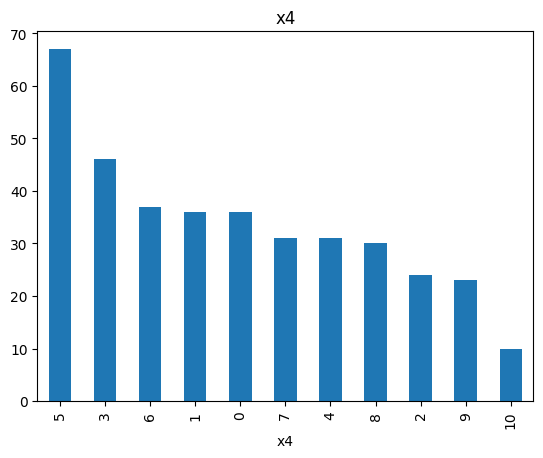

In [ ]:
feature = categorical_features[0]
count = realestate[feature].value_counts()
percent = 100*realestate[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

###Numerical Features

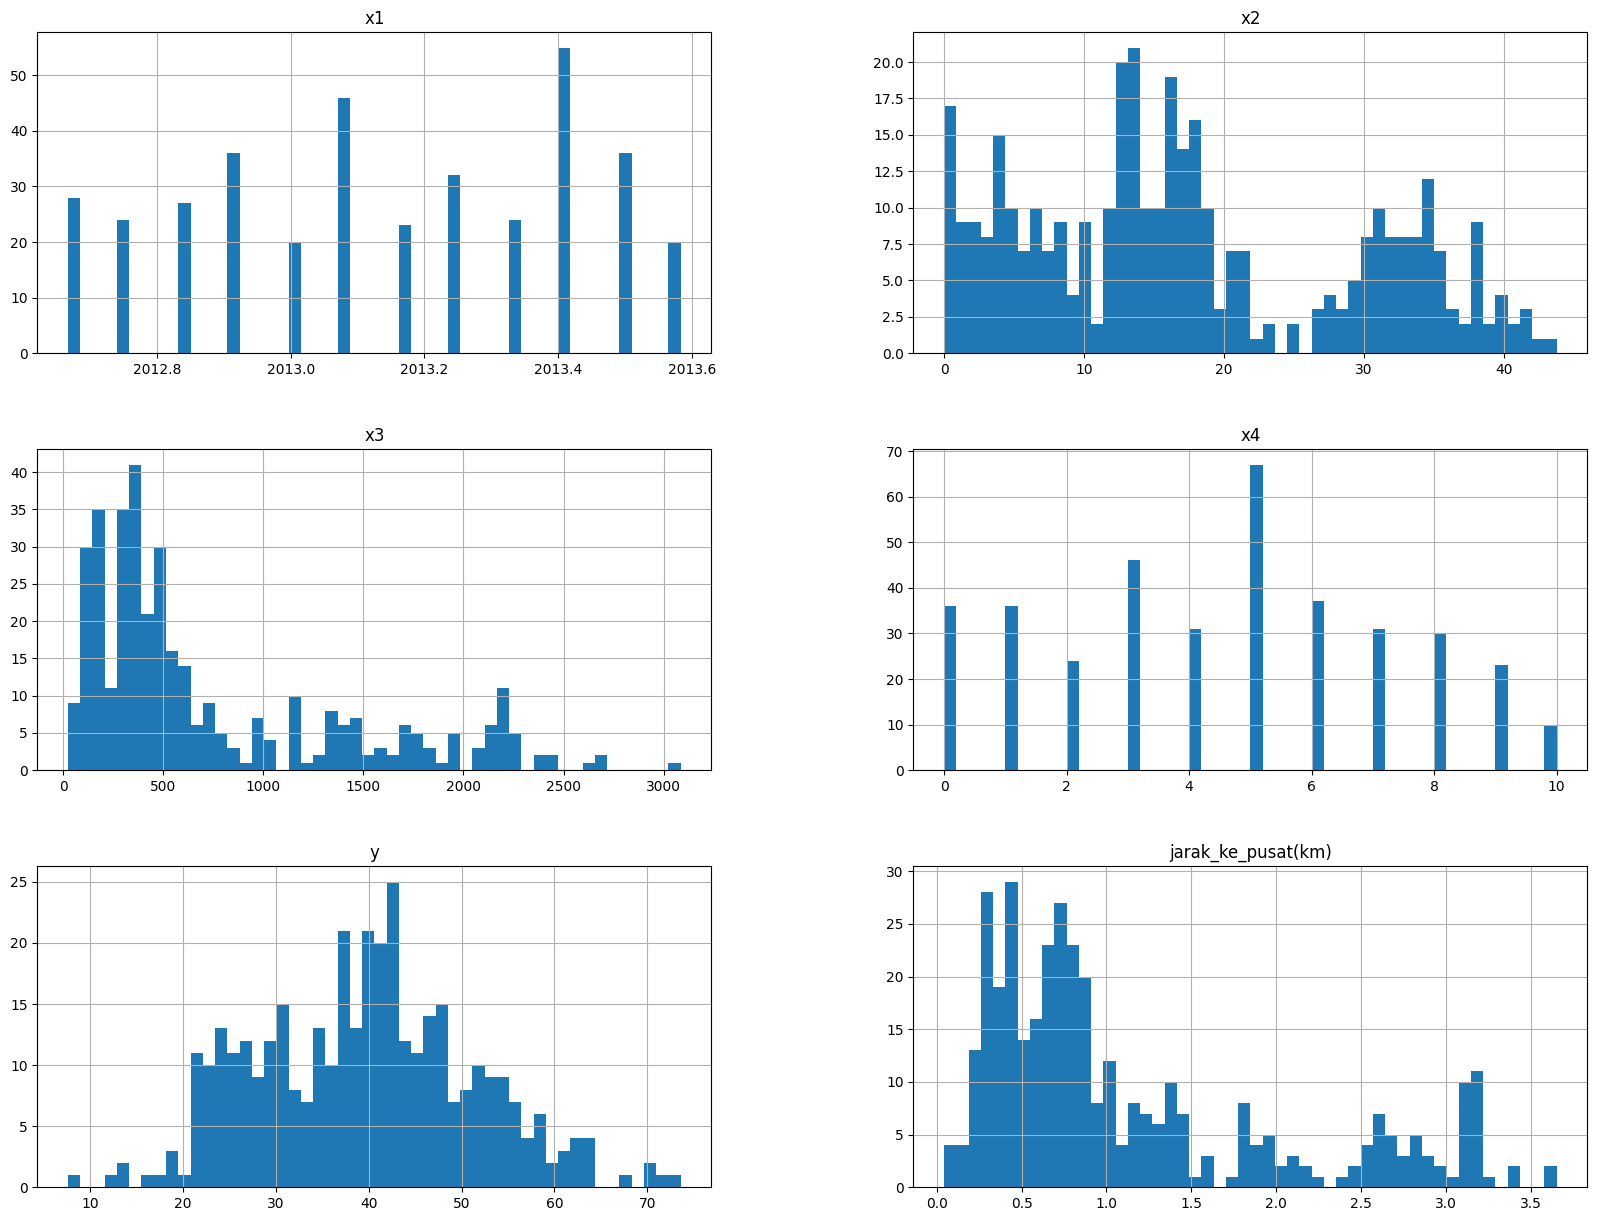

In [ ]:
realestate.hist(bins=50, figsize=(20,15))
plt.show()

##Multivariate Analysis

###Categorical Feature

In [ ]:
print(realestate.dtypes)

x1                    float64
x2                    float64
x3                    float64
x4                      int64
y                     float64
jarak_ke_pusat(km)    float64
dtype: object


<ipython-input-22-83c6fd9bd9a1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="y", kind="bar", dodge=False, height = 4, aspect = 3,  data=realestate, palette="Set3")


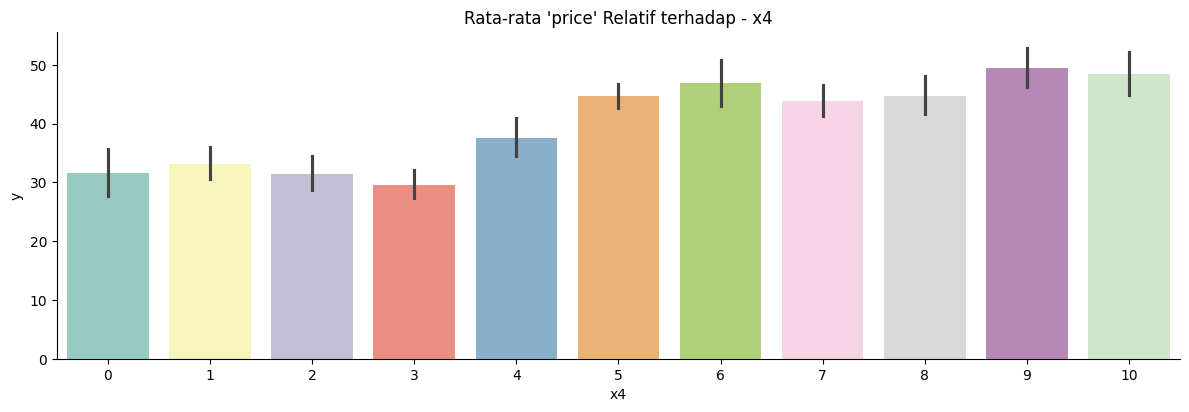

In [ ]:
cat_features = realestate.select_dtypes(include='int64').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="y", kind="bar", dodge=False, height = 4, aspect = 3,  data=realestate, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

###Numerical Features

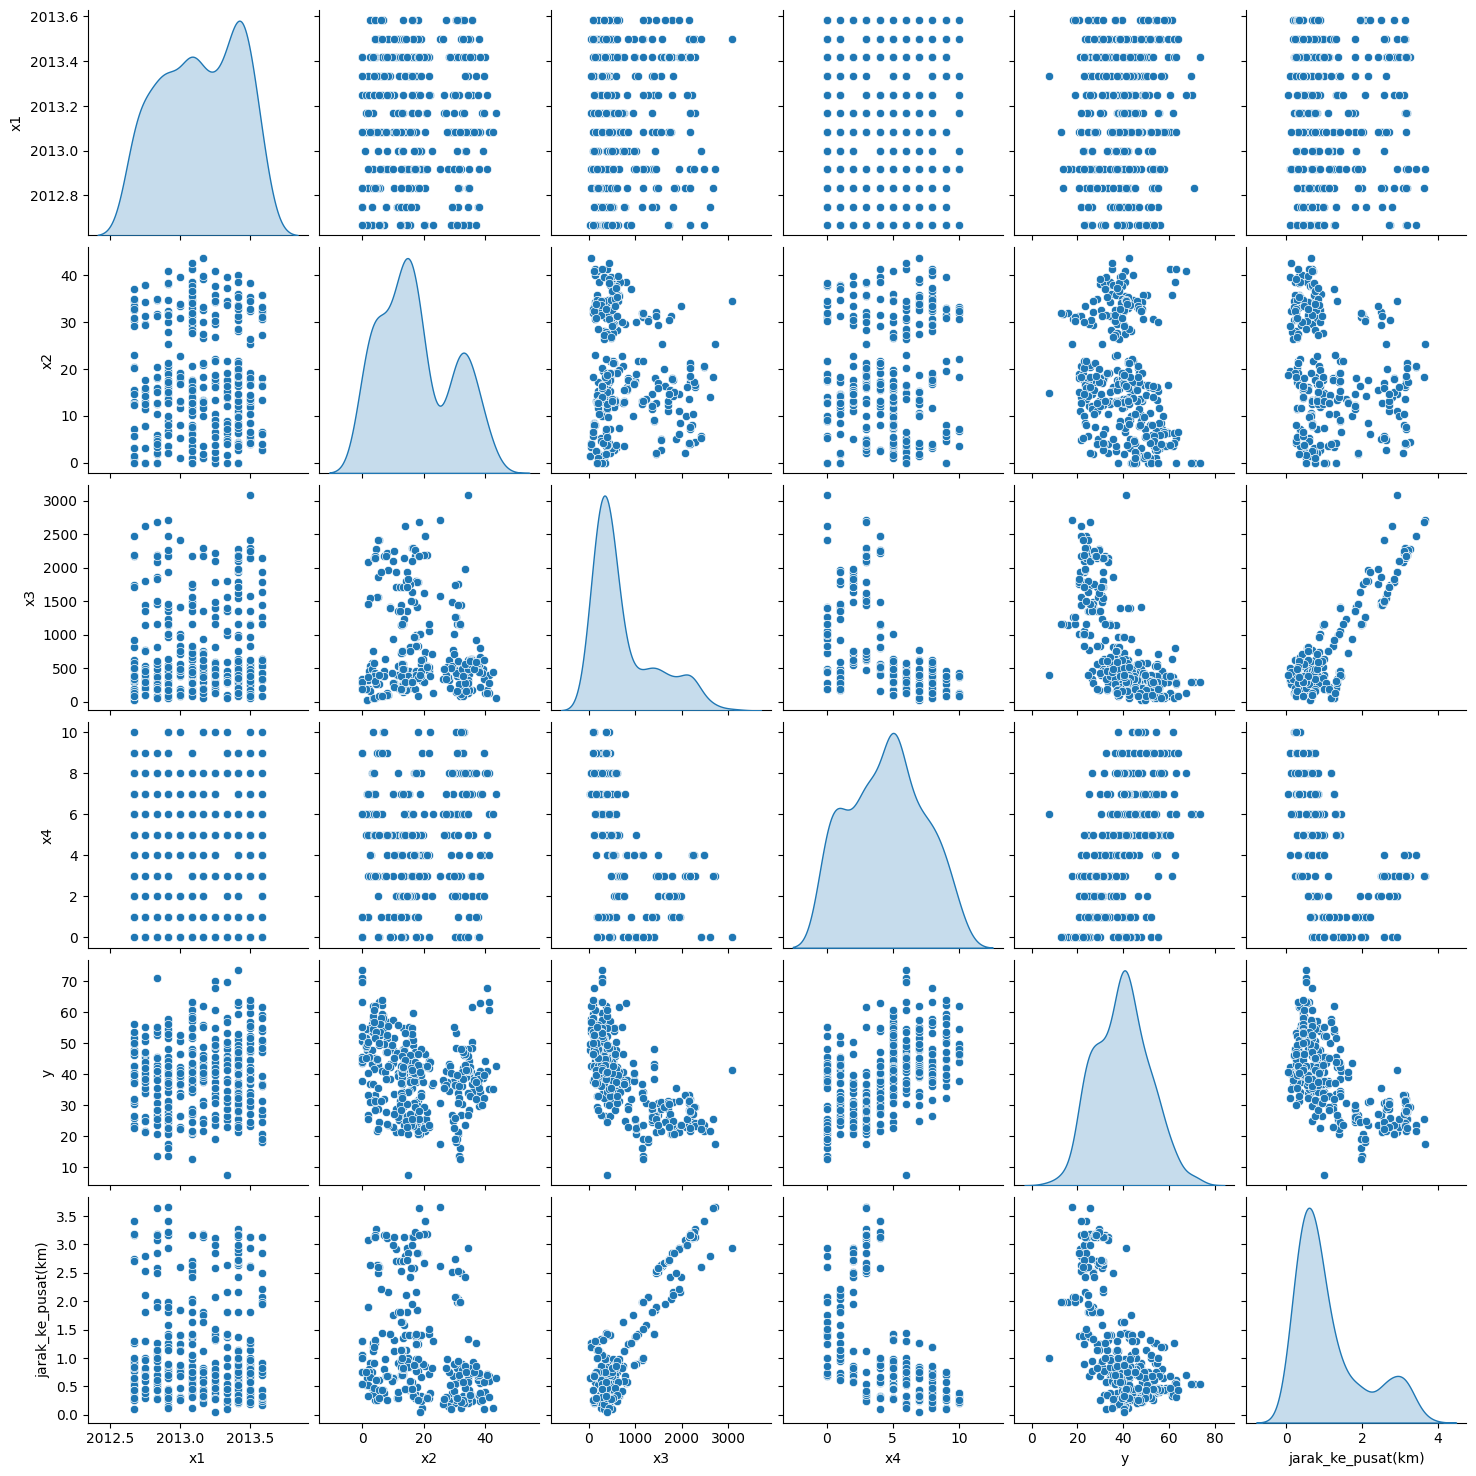

In [ ]:
sns.pairplot(realestate, diag_kind = 'kde')

###Melihat Korelasi menggunakan metode spearman

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

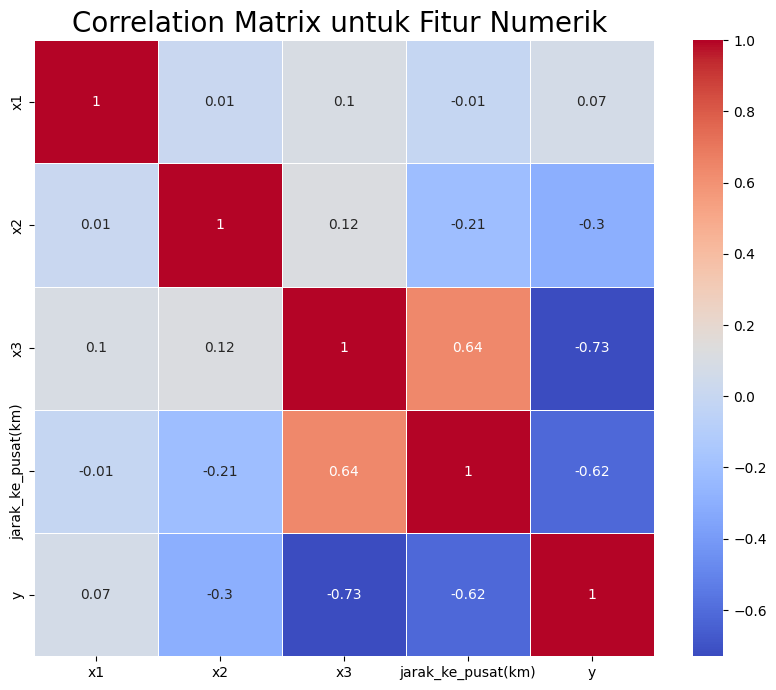

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = realestate[numerical_features].corr(method='spearman').round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [ ]:
realestate.drop(['x1'], inplace=True, axis=1)
realestate.head()

,x2,x3,x4,y,jarak_ke_pusat(km)
0,32.0,84.87882,10,37.9,0.265134
1,19.5,306.59470,9,42.2,0.111776
2,13.3,561.98450,5,47.3,0.693179
3,13.3,561.98450,5,54.8,0.693179
4,5.0,390.56840,5,43.1,0.298980


#Data Preparation

##Encoding Fitur Kategori

X1 yang merupakan data dengan nilai tanggal transaksi. Menurut saya akan lebih cocok dijadikan

In [ ]:
from sklearn.preprocessing import  OneHotEncoder
realestate = pd.concat([realestate, pd.get_dummies(realestate['x4'], prefix='x4').astype(int)], axis=1)
realestate.drop(['x4'], axis=1, inplace=True)
realestate.head()

,x2,x3,y,jarak_ke_pusat(km),x4_0,x4_1,x4_2,x4_3,x4_4,x4_5,x4_6,x4_7,x4_8,x4_9,x4_10
0,32.0,84.87882,37.9,0.265134,0,0,0,0,0,0,0,0,0,0,1
1,19.5,306.59470,42.2,0.111776,0,0,0,0,0,0,0,0,0,1,0
2,13.3,561.98450,47.3,0.693179,0,0,0,0,0,1,0,0,0,0,0
3,13.3,561.98450,54.8,0.693179,0,0,0,0,0,1,0,0,0,0,0
4,5.0,390.56840,43.1,0.298980,0,0,0,0,0,1,0,0,0,0,0


##Train-Test-Split

In [ ]:
from sklearn.model_selection import train_test_split

X = realestate.drop(["y"],axis =1)
y = realestate["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 122)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 371
Total # of sample in train dataset: 259
Total # of sample in test dataset: 112


##Standarisasi fitur

###Data Train

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['x2', 'x3', 'jarak_ke_pusat(km)']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,x2,x3,jarak_ke_pusat(km)
303,1.749707,-0.420323,-0.405719
163,-0.761887,-0.928059,-0.459401
159,-0.171915,0.150057,-0.593106
146,-1.478281,-0.805833,-0.107195
38,-1.217008,-0.210724,-0.211328


In [ ]:
X_train[numerical_features].describe().round(3)

,x2,x3,jarak_ke_pusat(km)
count,259.000,259.000,259.000
mean,-0.000,0.000,0.000
std,1.002,1.002,1.002
min,-1.478,-1.052,-1.135
25%,-0.804,-0.656,-0.726
50%,-0.172,-0.414,-0.387
75%,0.915,0.478,0.362
max,2.213,3.590,2.935


###Data Tes

In [ ]:
X_test[numerical_features] = scaler.transform(X_test.loc[:, numerical_features])
X_test[numerical_features].head()

,x2,x3,jarak_ke_pusat(km)
385,0.064074,-0.961297,-0.945392
172,-0.922022,-0.949821,-0.746968
413,-0.930450,-0.949821,-0.746968
334,1.050169,0.449346,-0.234891
216,1.707566,-0.191064,-0.541414


In [ ]:
X_test[numerical_features].describe().round(3)

,x2,x3,jarak_ke_pusat(km)
count,112.000,112.000,112.000
mean,-0.018,0.121,0.190
std,0.965,1.072,1.105
min,-1.478,-1.052,-1.202
25%,-0.808,-0.672,-0.596
50%,-0.096,-0.308,-0.255
75%,1.006,0.668,0.939
max,1.969,2.878,2.663


##PCA

###Data Train

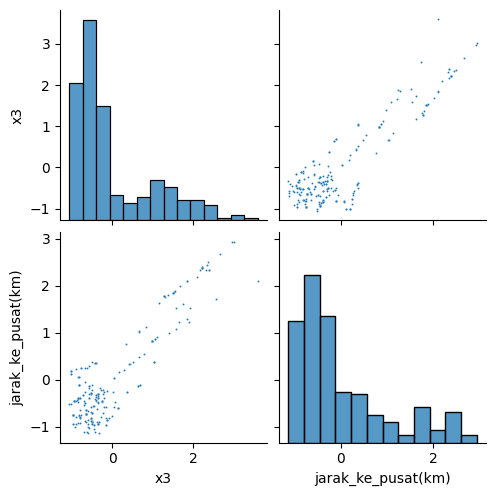

In [ ]:
sns.pairplot(X_train[['x3','jarak_ke_pusat(km)']], plot_kws={"s": 2});

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=123)
pca.fit(X_train[['x3','jarak_ke_pusat(km)']])
princ_comp = pca.transform(X_train[['x3','jarak_ke_pusat(km)']])

In [ ]:
pca.explained_variance_ratio_.round(2)

array([0.95, 0.05])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(X_train[['x3','jarak_ke_pusat(km)']])
X_train['akses_MRT_ke_pusat'] = pca.transform(X_train.loc[:, ('x3','jarak_ke_pusat(km)')]).flatten()
X_train.drop(['x3','jarak_ke_pusat(km)'], axis=1, inplace=True)

###Data Tes

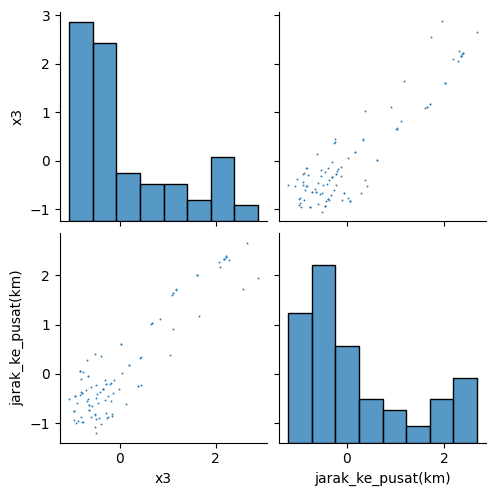

In [ ]:
sns.pairplot(X_test[['x3','jarak_ke_pusat(km)']], plot_kws={"s": 2});

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=123)
pca.fit(X_test[['x3','jarak_ke_pusat(km)']])
princ_comp = pca.transform(X_test[['x3','jarak_ke_pusat(km)']])

In [ ]:
pca.explained_variance_ratio_.round(2)

array([0.96, 0.04])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(X_test[['x3','jarak_ke_pusat(km)']])
X_test['akses_MRT_ke_pusat'] = pca.transform(X_test.loc[:, ('x3','jarak_ke_pusat(km)')]).flatten()
X_test.drop(['x3','jarak_ke_pusat(km)'], axis=1, inplace=True)

#Model Development

In [ ]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Dictionary model dan parameter grid
models_param_grids = {
    'KNN': (KNeighborsRegressor(), {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }),
    'RandomForest': (RandomForestRegressor(random_state=42), {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    'Boosting': (GradientBoostingRegressor(random_state=42), {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    })
}

# Mencari hyperparameter terbaik untuk setiap model
best_params = {}
for name, (model, param_grid) in models_param_grids.items():
    grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
    grid.fit(X_train, y_train)
    best_params[name] = grid.best_params_

print("Best Parameters for All Models:")
for model_name, params in best_params.items():
    print(f"{model_name}: {params}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, wei

##Model Development dengan K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=15)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

##Model Development dengan Random Forest

In [ ]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=20, max_depth=5, random_state=35, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

##Model Development dengan Boosting Algorithm

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(n_estimators=300,
                             learning_rate=0.01,
                             random_state=42)

boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

##Evaluasi Model

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,0.050772,0.058123
RF,0.021144,0.044463
Boosting,0.039492,0.047904


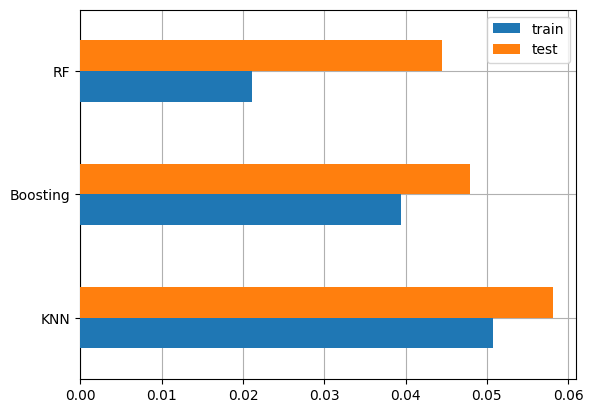

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(X_test).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
385,46.6,49.0,41.7,43.2
172,58.1,52.1,55.6,52.7
413,63.9,52.1,55.6,52.7
334,22.8,39.6,31.5,35.9
216,39.7,38.4,37.0,40.8
...,...,...,...,...
287,32.9,41.0,35.2,36.7
129,41.0,40.8,40.9,43.2
182,23.6,27.1,27.2,27.0
102,54.4,48.8,53.4,53.4


In [ ]:
pred_dict = {
    'y_true': y_test
}

for name, model in model_dict.items():
    pred_dict[f'prediksi_{name}'] = model.predict(X_test).round(1)

pred_df = pd.DataFrame(pred_dict)

model_names = [col for col in pred_df.columns if col.startswith('prediksi_')]
for model in model_names:
    pred_df[f'error_{model}'] = np.abs(pred_df['y_true'] - pred_df[model])

pred_df['best_model'] = pred_df[[f'error_{model}' for model in model_names]].idxmin(axis=1)

conf_matrix = pd.DataFrame(
    {model: [(pred_df['best_model'] == f'error_{model}').sum() for model in model_names]},
    index=model_names
)

print("Confusion Matrix Berdasarkan Selisih Terkecil:")
print(conf_matrix)

Confusion Matrix Berdasarkan Selisih Terkecil:
                   prediksi_Boosting
prediksi_KNN                      37
prediksi_RF                       44
prediksi_Boosting                 31
